In [4]:
!pip install yfinance # uncomment these to install missing packages if they are not already installed
!pip install pandas

In [2]:
import yfinance as yf
import pandas as pd
# from google.colab import files
# uploaded = files.upload()  # This will prompt you to select a file


# Assuming your CSV file is named 'data.csv'
# import io
# import pandas as pd
# df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

def get_price(tick,start='2022-10-01',end=None):
    return yf.Ticker(tick).history(start=start,end=end)['Close']

def get_prices(tickers,start='2022-10-01',end=None):
    df=pd.DataFrame()
    for s in tickers:
        df[s]=get_price(s,start,end)
    return df

# Prepare training and testing data sets

In [3]:
feature_stocks=['tsla','meta','goog','amzn','nflx','gbtc','gdx','intc','dal','c']
predict_stock='msft'

# training set
start_date_train='2023-1-01'
end_date_train='2024-6-30'

X_train=get_prices(feature_stocks,start=start_date_train,end=end_date_train)
y_train=get_prices([predict_stock],start=start_date_train,end=end_date_train)

# testing set
start_date_test='2024-11-01'
end_date_test='2024-12-31'
X_test=get_prices(feature_stocks,start=start_date_test,end=end_date_test)
y_test=get_prices([predict_stock],start=start_date_test,end=end_date_test)

In [4]:
X_train

,tsla,meta,goog,amzn,nflx,gbtc,gdx,intc,dal,c
Date,,,,,,,,,,
2023-01-03 00:00:00-05:00,108.099998,124.265312,89.378853,85.820000,294.950012,8.200000,28.842234,25.775145,32.105247,41.898052
2023-01-04 00:00:00-05:00,113.639999,126.885307,88.392395,85.139999,309.410004,8.380000,30.067492,26.691210,33.857697,42.977997
2023-01-05 00:00:00-05:00,110.339996,126.456940,86.459335,83.120003,309.700012,8.450000,29.804935,26.575495,34.684692,42.785809
2023-01-06 00:00:00-05:00,113.059998,129.525223,87.844376,86.080002,315.549988,8.650000,30.689848,27.703697,35.472309,43.298317
2023-01-09 00:00:00-05:00,119.769997,128.977310,88.482086,87.360001,315.170013,9.650000,30.398119,28.262983,36.200855,43.508820
...,...,...,...,...,...,...,...,...,...,...
2024-06-24 00:00:00-04:00,182.580002,498.032776,180.347717,185.570007,669.020020,52.610001,33.852570,30.377298,49.083549,59.807236
2024-06-25 00:00:00-04:00,187.350006,509.702240,185.126007,186.339996,672.409973,55.020000,33.447327,30.546227,48.497330,60.041241
2024-06-26 00:00:00-04:00,196.369995,512.217773,184.916504,193.610001,677.690002,54.130001,33.427559,30.347488,47.871361,59.719482


In [5]:
y_train

,msft
Date,
2023-01-03 00:00:00-05:00,235.711716
2023-01-04 00:00:00-05:00,225.400909
2023-01-05 00:00:00-05:00,218.720535
2023-01-06 00:00:00-05:00,221.298233
2023-01-09 00:00:00-05:00,223.452881
...,...
2024-06-24 00:00:00-04:00,445.971924
2024-06-25 00:00:00-04:00,449.239441
2024-06-26 00:00:00-04:00,450.444855


# Convert training and testing data into numpy array

In [6]:
import numpy as np

X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)


# Use linear regression to predict msft stock price from the other stocks' prices

## 1. Append a dummy feature to both X_train and X_test

In [7]:
# Your solution here
# For the training set:
dummy_train = np.ones((X_train.shape[0], 1))
X_train = np.hstack((X_train, dummy_train))

# For the testing set:
dummy_test = np.ones((X_test.shape[0], 1))
X_test = np.hstack((X_test, dummy_test))


## 2. Find the best linear regression model based on your training data ($w=(X X')^{-1} X y$)
### Note that you may need to transpose the matrices to make things work



In [8]:
# Your solution here
# Compute the weights (w) from the training data
w = np.linalg.inv(X_train.T @ X_train) @ (X_train.T @ y_train)

print("Computed weights (w):")
print(w)

# Use the computed model to make predictions on the testing set
y_pred_test = X_test @ w

# Optionally, display the predicted values for the test set
print("Predicted values for test set:")
print(y_pred_test)

Computed weights (w):
[[ 0.17607937]
 [ 0.26173388]
 [ 0.34633149]
 [ 0.30070756]
 [ 0.19781141]
 [-0.48559307]
 [ 2.33864089]
 [ 0.69146308]
 [-1.90152143]
 [ 0.50280353]
 [16.56259882]]
Predicted values for test set:
[[479.48554523]
 [478.10131747]
 [483.94106939]
 [488.44798944]
 [506.5134172 ]
 [506.18660077]
 [497.78036435]
 [493.94930211]
 [494.11936502]
 [489.70333242]
 [478.07692329]
 [492.18077458]
 [499.92735559]
 [502.3318391 ]
 [500.50710511]
 [500.91915235]
 [493.50621166]
 [500.8973965 ]
 [498.22024075]
 [504.73047351]
 [515.09584921]
 [523.90604352]
 [524.23826951]
 [522.98470038]
 [536.16327279]
 [538.16719756]
 [543.4764068 ]
 [559.84436319]
 [555.48134469]
 [550.08885262]
 [559.74757517]
 [559.31048182]
 [534.95550451]
 [535.48466711]
 [533.49867925]
 [541.73828087]
 [551.69315938]
 [548.71699444]
 [540.33251281]
 [532.32369602]]


## 3. Report your training and testing error
### How far your prediction from the actual price. Compute the mean square error for both training and testing

In [1]:
# Your solution here
mse_train = np.mean((y_train - y_pred_train) ** 2)
mse_test = np.mean((y_test - y_pred_test) ** 2)

print("Training Mean Squared Error:", mse_train)
print("Testing Mean Squared Error:", mse_test)

NameError: name 'np' is not defined

StockPredictor(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=20, bias=True)
  (fc5): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)
Epoch 1/50, Train Loss: 120776.7297, Val Loss: 177552.5425
Epoch 2/50, Train Loss: 118724.8554, Val Loss: 172773.4618
Epoch 3/50, Train Loss: 114087.8223, Val Loss: 159264.6116
Epoch 4/50, Train Loss: 97639.8187, Val Loss: 102819.6971
Epoch 5/50, Train Loss: 32994.6628, Val Loss: 47471.6075
Epoch 6/50, Train Loss: 11044.4465, Val Loss: 6967.3601
Epoch 7/50, Train Loss: 5328.6701, Val Loss: 16444.1072
Epoch 8/50, Train Loss: 1914.4432, Val Loss: 455.6878
Epoch 9/50, Train Loss: 535.8168, Val Loss: 1228.5847
Epoch 10/50, Train Loss: 359.2810, Val Loss: 2133.0983
Epoch 11/50, Train Loss: 292.8080, Val 

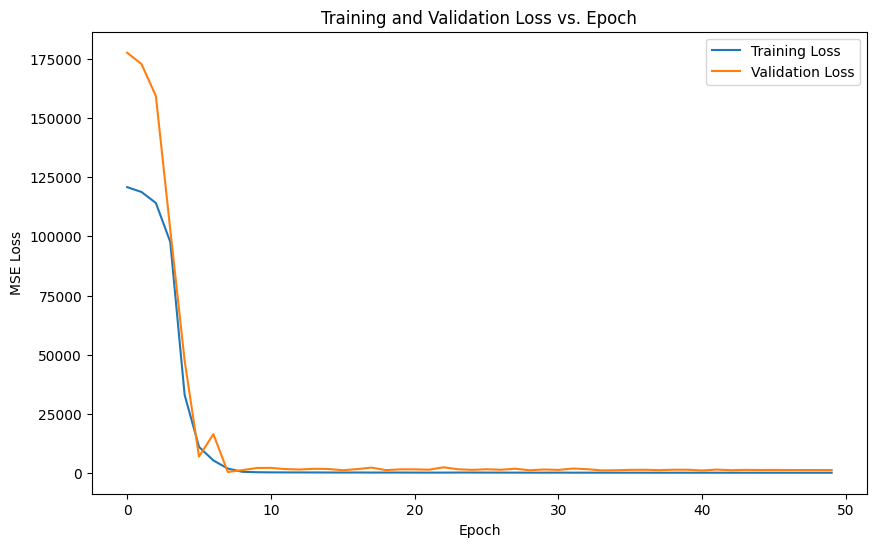

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader

# Functions to download stock data
def get_price(tick, start='2022-10-01', end=None):
    return yf.Ticker(tick).history(start=start, end=end)['Close']

def get_prices(tickers, start='2022-10-01', end=None):
    df = pd.DataFrame()
    for s in tickers:
        df[s] = get_price(s, start, end)
    return df

# Define the tickers
feature_stocks = ['tsla','meta','goog','amzn','nflx','gbtc','gdx','intc','dal','c']
predict_stock = 'msft'

# Training data: 2023-01-01 to 2024-06-30
start_date_train = '2023-01-01'
end_date_train   = '2024-06-30'
X_train_df = get_prices(feature_stocks, start=start_date_train, end=end_date_train)
y_train_df = get_prices([predict_stock], start=start_date_train, end=end_date_train)

# Validation data: 2024-07-01 to 2024-10-31
start_date_val = '2024-07-01'
end_date_val   = '2024-10-31'
X_val_df = get_prices(feature_stocks, start=start_date_val, end=end_date_val)
y_val_df = get_prices([predict_stock], start=start_date_val, end=end_date_val)

# Test data: 2024-11-01 to 2024-12-31
start_date_test = '2024-11-01'
end_date_test   = '2024-12-31'
X_test_df = get_prices(feature_stocks, start=start_date_test, end=end_date_test)
y_test_df = get_prices([predict_stock], start=start_date_test, end=end_date_test)

# Convert DataFrames to numpy arrays
X_train = np.array(X_train_df)
y_train = np.array(y_train_df)
X_val   = np.array(X_val_df)
y_val   = np.array(y_val_df)
X_test  = np.array(X_test_df)
y_test  = np.array(y_test_df)

# Convert to PyTorch tensors (ensure they are float)
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_val   = torch.from_numpy(X_val).float()
y_val   = torch.from_numpy(y_val).float()
X_test  = torch.from_numpy(X_test).float()
y_test  = torch.from_numpy(y_test).float()

# Create DataLoader objects for batching
batch_size = 32
train_dataset = TensorDataset(X_train, y_train)
val_dataset   = TensorDataset(X_val, y_val)
test_dataset  = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size)
test_loader  = DataLoader(test_dataset, batch_size=batch_size)

#Part 2
import torch.nn as nn

class StockPredictor(nn.Module):
    def __init__(self, input_dim):
        super(StockPredictor, self).__init__()
        self.fc1 = nn.Linear(input_dim, 20)
        self.fc2 = nn.Linear(20, 20)
        self.fc3 = nn.Linear(20, 20)
        self.fc4 = nn.Linear(20, 20)
        self.fc5 = nn.Linear(20, 20)
        self.out = nn.Linear(20, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.relu(self.fc5(x))
        x = self.out(x)
        return x

# Instantiate the model; here input_dim is 10
input_dim = len(feature_stocks)
model = StockPredictor(input_dim)
print(model)

import matplotlib.pyplot as plt

# Loss function
criterion = nn.MSELoss()

# Choose an optimizer; here we use Adam (you can switch to SGD or SGD with momentum)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Option: Define a learning rate scheduler (see Step 4 below)
# For example, OneCycleLR:
num_epochs = 50
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=num_epochs)

# Training loop
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        scheduler.step()  # update learning rate if using a per-batch scheduler
        running_train_loss += loss.item() * X_batch.size(0)
    epoch_train_loss = running_train_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            running_val_loss += loss.item() * X_batch.size(0)
    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    val_losses.append(epoch_val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}")

# Plot training and validation loss vs. epoch
plt.figure(figsize=(10,6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.show()

total_params = sum(p.numel() for p in model.parameters())
print("Total number of parameters:", total_params)
